In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
read_df = pd.read_csv(Path('../Data/cleaned_adoptions2020_2021.csv'))

In [5]:
read_df.head()

,id,name,url,type,primary_breed,seondary_breed,mixed_breed,unknown_breed,primary_color,secondary_color,...,postcode,country,adopt_date,post_date,adoption_days,breed_count,tag_input,photo_input,description_input,adoption_bin
0,50175720,Remy,https://www.petfinder.com/dog/remy-50175720/ga...,Dog,Speciality,NaN,False,False,"Tricolor (Brown, Black, & White)",NaN,...,30127,US,2021-02-02,2020-12-31,33,169,True,True,True,3
1,50175862,Peapod*little hiking buddy,https://www.petfinder.com/dog/peapod-star-litt...,Dog,Chihuahua,NaN,True,False,Golden,NaN,...,95945,US,2021-02-06,2020-12-31,37,2773,False,True,True,3
2,50175865,Pups,https://www.petfinder.com/dog/pups-50175865/md...,Dog,Mixed Breed,NaN,True,False,Unanswered,NaN,...,20637,US,2021-01-03,2020-12-31,3,2618,False,True,True,1
3,50175869,Macy--NEEDS A QUIET HOME,https://www.petfinder.com/dog/macy-needs-a-qui...,Dog,Speciality,Lhasa Apso,True,False,White / Cream,NaN,...,37064,US,2021-01-16,2020-12-31,16,195,False,True,True,2
4,50175868,Rachel,https://www.petfinder.com/dog/rachel-50175868/...,Dog,Chihuahua,NaN,False,False,Brown / Chocolate,NaN,...,95948,US,2021-01-08,2020-12-31,8,2773,False,True,True,2


In [6]:
# Columns from our Original Dataset

for x in read_df.columns:
    print(x)

id
name
url
type
primary_breed
seondary_breed
mixed_breed
unknown_breed
primary_color
secondary_color
age
gender
size
coat
house_trained
spayed_neutered
special_needs
shots_current
gw_children
gw_dogs
gw_cats
tags
description
photo_urls
status
status_changed_at
published_at
city
state
postcode
country
adopt_date
post_date
adoption_days
breed_count
tag_input
photo_input
description_input
adoption_bin


In [7]:
# Creating 6 bins to classify which adoption bin to place dogs into.

bins = [-1,1,7,30,90,180,500]

classifier=['0','1','2','3','4','5']
# ageCategory = ["same_day","first_week","first_month","three_months","hundred_days","longer"]

read_df["adoption_bin"] = pd.cut(read_df["adoption_days"], bins, labels = classifier)

In [10]:
# Created a subset of our original dataframe with only the columns that we wanted.

model_df = read_df[['primary_breed','mixed_breed','unknown_breed','primary_color','age','gender','size','coat','house_trained','spayed_neutered','special_needs','shots_current','gw_children','gw_dogs','gw_cats','tag_input','photo_input','description_input','adoption_bin']]

# Separate our data frame into features and target

X = model_df.drop(['adoption_bin'], axis=1)
y = model_df['adoption_bin']


In [11]:
# Using get_dummies to convert our data to numeric

X_dummies = pd.get_dummies(X)

X_dummies = X_dummies.drop(['unknown_breed','description_input'], axis=1)

In [12]:
for x in X_dummies.columns:
    print(x)

mixed_breed
house_trained
spayed_neutered
special_needs
shots_current
tag_input
photo_input
primary_breed_American Bulldog
primary_breed_American Staffordshire Terrier
primary_breed_Australian Cattle Dog / Blue Heeler
primary_breed_Australian Shepherd
primary_breed_Beagle
primary_breed_Black Labrador Retriever
primary_breed_Border Collie
primary_breed_Boxer
primary_breed_Catahoula Leopard Dog
primary_breed_Cattle Dog
primary_breed_Chihuahua
primary_breed_Dachshund
primary_breed_German Shepherd Dog
primary_breed_Great Dane
primary_breed_Great Pyrenees
primary_breed_Hound
primary_breed_Husky
primary_breed_Jack Russell Terrier
primary_breed_Labrador Retriever
primary_breed_Miniature Pinscher
primary_breed_Mixed Breed
primary_breed_Pit Bull Terrier
primary_breed_Retriever
primary_breed_Rottweiler
primary_breed_Shepherd
primary_breed_Shih Tzu
primary_breed_Siberian Husky
primary_breed_Speciality
primary_breed_Terrier
primary_breed_Yorkshire Terrier
primary_color_Apricot / Beige
primary_colo

In [13]:
# Split our data into a training set and a testing set

X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, random_state=1)

In [15]:
# Train a Random Forest Classifier model and print the model score

clf_scaled = RandomForestClassifier(random_state=1, n_estimators=500)
clf_scaled.fit(X_train, y_train)

print(f"Training Data Score: {clf_scaled.score(X_train, y_train)}")
print(f"Testing Data Score: {clf_scaled.score(X_test, y_test)}")

Training Data Score: 0.8986890302679776
Testing Data Score: 0.4960478118372855


# Optimization Attempt

In [16]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [18]:
# Use the random grid to search for best hyperparameters

# First create the base model to tune
rf = RandomForestClassifier(random_state=1)

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=1, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=1, verbose=2)

In [19]:
# List the best parameters for this dataset

print(rf_random.best_params_)

{'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': True}


In [21]:
clf_scaled = RandomForestClassifier(random_state=1, n_estimators = 800, min_samples_split = 2, min_samples_leaf= 1, max_features= 'sqrt', max_depth= 30, bootstrap= True)
clf_scaled.fit(X_train, y_train)

print(f"Training Data Score: {clf_scaled.score(X_train, y_train)}")
print(f"Testing Data Score: {clf_scaled.score(X_test, y_test)}")

Training Data Score: 0.8974037658248185
Testing Data Score: 0.4995180258338153


# Feature Importances

In [22]:
feature_importances = clf_scaled.feature_importances_
feature_importances

array([0.04381057, 0.02686012, 0.03441444, 0.00889691, 0.02173446,
       0.02575644, 0.00532692, 0.00467724, 0.00569929, 0.00729888,
       0.00661766, 0.00933771, 0.00354349, 0.00651569, 0.00847054,
       0.00333083, 0.00449132, 0.01144303, 0.00716331, 0.01114569,
       0.00233182, 0.00351873, 0.00995509, 0.00717567, 0.00462237,
       0.01896405, 0.00260108, 0.01370059, 0.01314329, 0.00428927,
       0.0035915 , 0.01105031, 0.00353108, 0.0036931 , 0.02951811,
       0.01376857, 0.00301362, 0.01438631, 0.01598328, 0.03162114,
       0.01331794, 0.01958932, 0.00906864, 0.01129702, 0.0014895 ,
       0.0032668 , 0.00207596, 0.01226765, 0.00256367, 0.01643785,
       0.02558633, 0.02037084, 0.01441311, 0.01672585, 0.01260789,
       0.00893294, 0.01665248, 0.03377871, 0.03395023, 0.00375155,
       0.01729352, 0.02117818, 0.01456654, 0.00276367, 0.00038361,
       0.00972196, 0.02272253, 0.02712317, 0.02203575, 0.00421471,
       0.00882297, 0.01753825, 0.01774505, 0.00516149, 0.01192

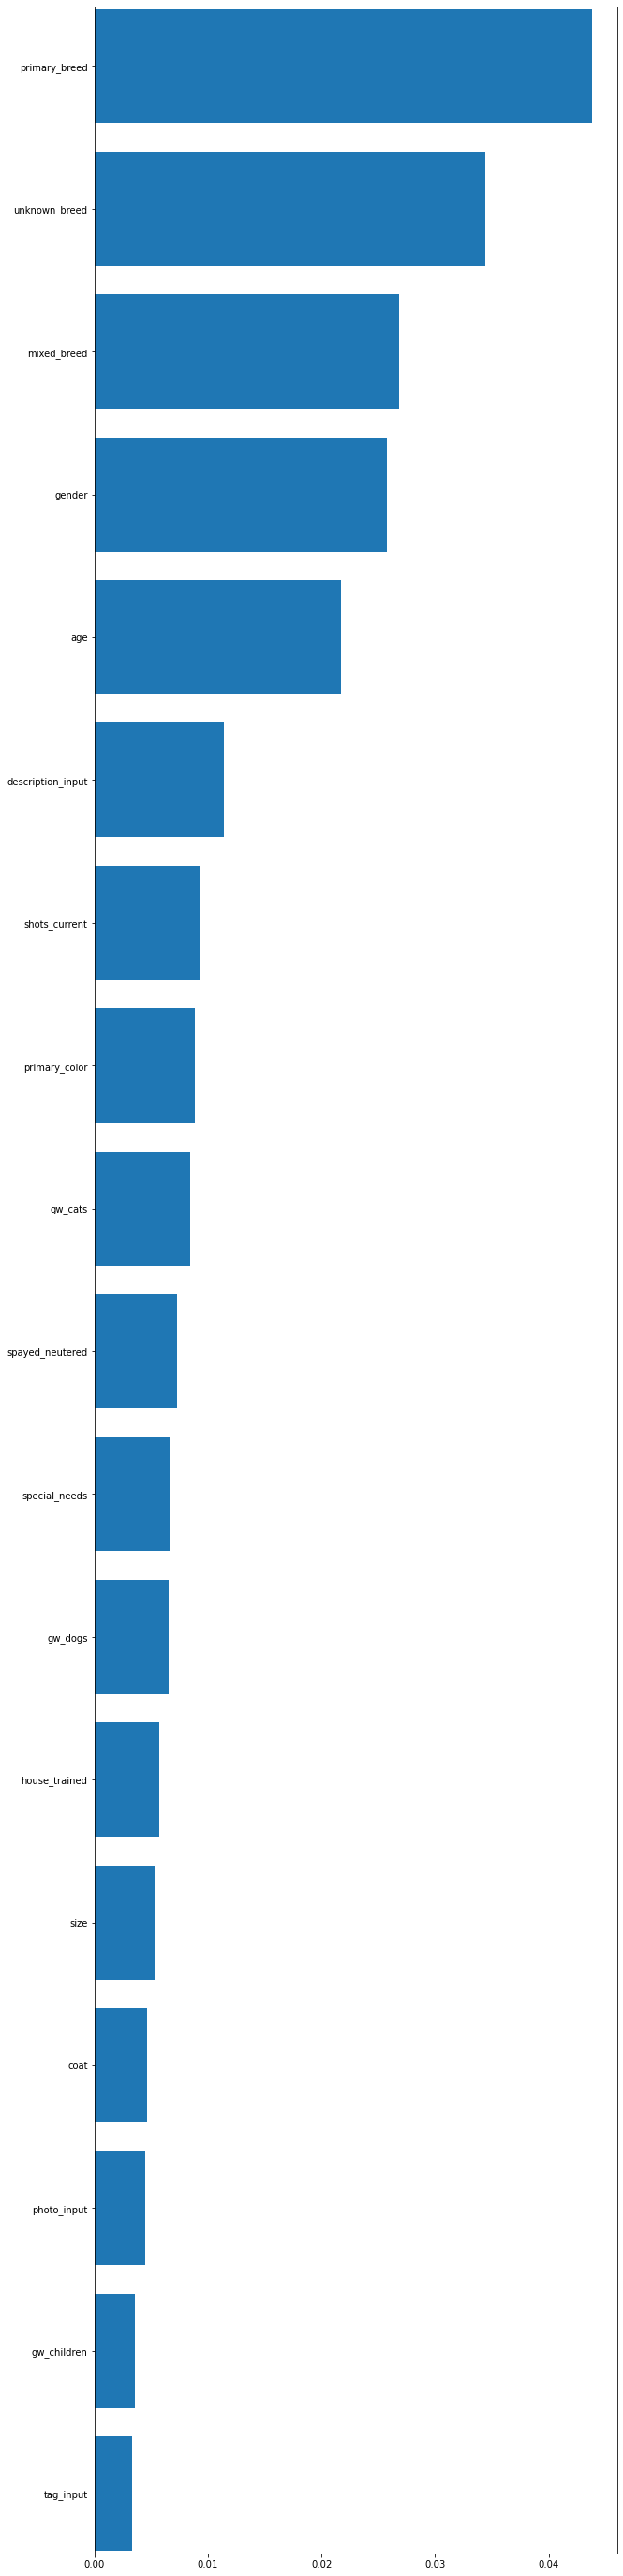

In [23]:
features = sorted(zip(X.columns, clf_scaled.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,50)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

# Analysis / Classification Report

In [24]:
from sklearn.metrics import confusion_matrix, classification_report

y_true = y_test
y_pred = clf_scaled.predict(X_test)

confusion_matrix(y_true, y_pred)

array([[ 283,  248,  348,   45,    5,    5],
       [  88, 1378, 1280,  151,   12,    4],
       [  73,  752, 2836,  331,   32,   12],
       [  14,  278,  936,  519,   29,    4],
       [   7,   57,  260,   53,  113,    1],
       [   6,   26,  103,   25,    7,   53]], dtype=int64)

In [25]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.30      0.40       934
           1       0.50      0.47      0.49      2913
           2       0.49      0.70      0.58      4036
           3       0.46      0.29      0.36      1780
           4       0.57      0.23      0.33       491
           5       0.67      0.24      0.35       220

    accuracy                           0.50     10374
   macro avg       0.55      0.37      0.42     10374
weighted avg       0.51      0.50      0.48     10374



# Export Model

In [26]:
import joblib

# save

joblib.dump(clf_scaled, "random_forest.joblib")

['random_forest.joblib']